In [2]:
import pandas as pd

df = pd.read_csv('/content/googleplaystore.csv')
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data = df[['Rating', 'Reviews', 'Installs', 'Size']].copy()
data.head()


,Rating,Reviews,Installs,Size
0,4.1,159,"10,000+",19M
1,3.9,967,"500,000+",14M
2,4.7,87510,"5,000,000+",8.7M
3,4.5,215644,"50,000,000+",25M
4,4.3,967,"100,000+",2.8M


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    9367 non-null   float64
 1   Reviews   10841 non-null  object 
 2   Installs  10841 non-null  object 
 3   Size      10841 non-null  object 
dtypes: float64(1), object(3)
memory usage: 338.9+ KB


In [5]:
data = data.dropna()


In [7]:
data['Reviews'].unique()[:10]



array(['159', '967', '87510', '215644', '167', '178', '36815', '13791',
       '121', '13880'], dtype=object)

In [8]:
data['Reviews'] = (
    data['Reviews']
    .astype(str)
    .str.replace('[^0-9]', '', regex=True)
)

data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')


In [9]:
data = data.dropna()
data['Reviews'] = data['Reviews'].astype(int)


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    9367 non-null   float64
 1   Reviews   9367 non-null   int64  
 2   Installs  9367 non-null   object 
 3   Size      9367 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 365.9+ KB


In [11]:
data['Installs'] = (
    data['Installs']
    .astype(str)
    .str.replace('[+,]', '', regex=True)
)

data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')


In [12]:
data = data.dropna()
data['Installs'] = data['Installs'].astype(int)


In [13]:
import numpy as np

def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

data['Size'] = data['Size'].astype(str).apply(convert_size)


In [14]:
data = data.dropna()


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7729 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    7729 non-null   float64
 1   Reviews   7729 non-null   int64  
 2   Installs  7729 non-null   int64  
 3   Size      7729 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 301.9 KB


In [16]:
data.describe()


,Rating,Reviews,Installs,Size
count,7729.000000,7.729000e+03,7.729000e+03,7729.000000
mean,4.173852,2.946726e+05,8.417734e+06,22.957271
std,0.544563,1.863227e+06,5.013846e+07,23.445811
min,1.000000,1.000000e+00,1.000000e+00,0.008301
25%,4.000000,1.080000e+02,1.000000e+04,5.300000
50%,4.300000,2.328000e+03,1.000000e+05,14.000000
75%,4.500000,3.896100e+04,1.000000e+06,33.000000
max,5.000000,4.489389e+07,1.000000e+09,100.000000


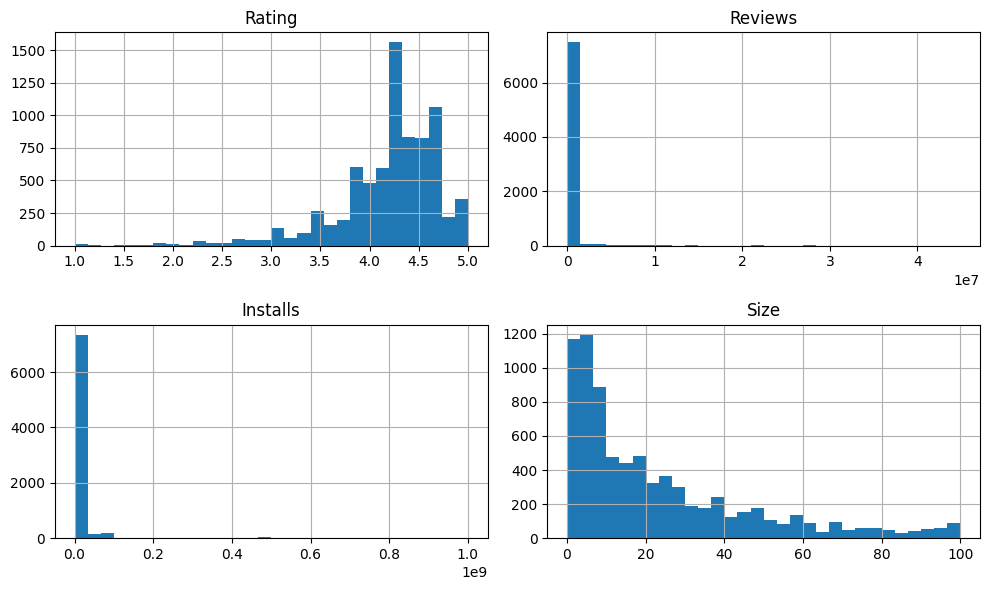

In [17]:
import matplotlib.pyplot as plt

data.hist(bins=30, figsize=(10,6))
plt.tight_layout()
plt.show()


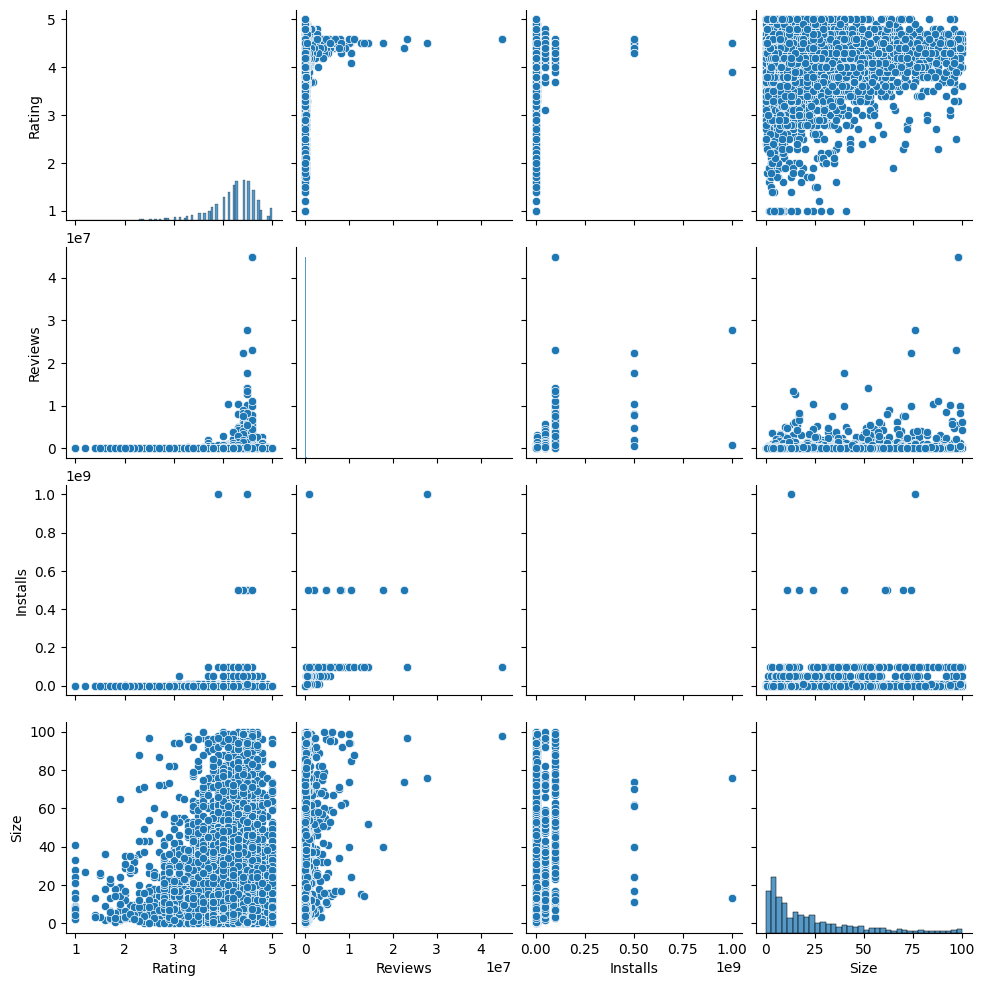

In [18]:
import seaborn as sns

sns.pairplot(data)
plt.show()


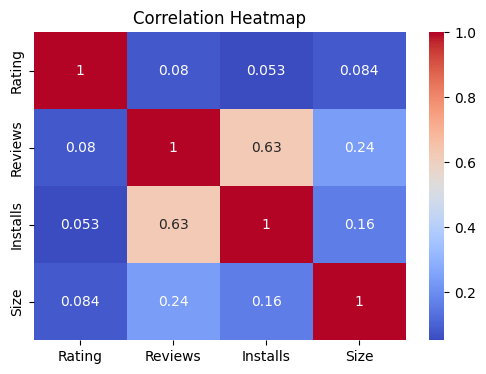

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


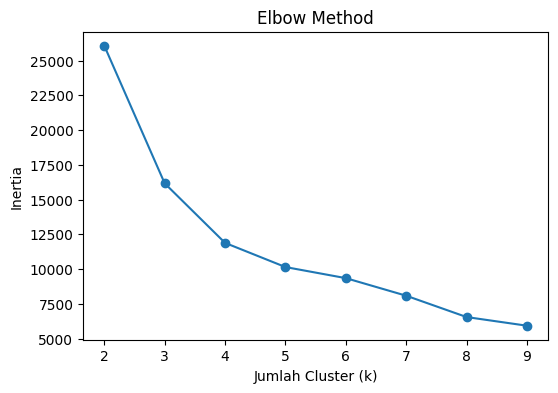

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,10), inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [22]:
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f'k = {k}, Silhouette Score = {score:.4f}')


k = 2, Silhouette Score = 0.3210
k = 3, Silhouette Score = 0.4395
k = 4, Silhouette Score = 0.4473
k = 5, Silhouette Score = 0.4557


In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


In [24]:
data.head()


,Rating,Reviews,Installs,Size,Cluster
0,4.1,159,10000,19.0,0
1,3.9,967,500000,14.0,0
2,4.7,87510,5000000,8.7,0
3,4.5,215644,50000000,25.0,0
4,4.3,967,100000,2.8,0


In [25]:
cluster_summary = data.groupby('Cluster').mean()
cluster_summary


,Rating,Reviews,Installs,Size
Cluster,,,,
0,4.142445,6.493449e+04,2.583618e+06,12.354447
1,4.387500,1.632271e+07,5.375000e+08,56.770833
2,4.280095,6.580647e+05,1.415447e+07,59.921335


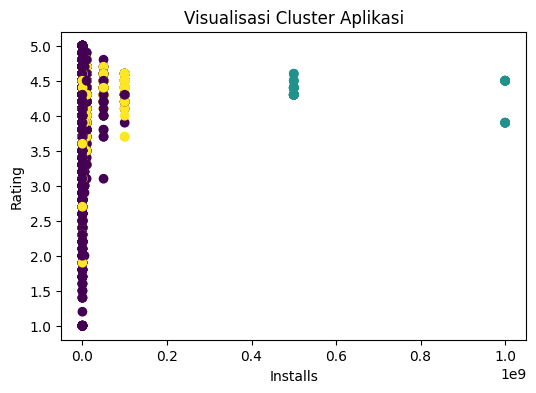

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(data['Installs'], data['Rating'],
            c=data['Cluster'], cmap='viridis')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Visualisasi Cluster Aplikasi')
plt.show()


In [27]:
data.to_csv('hasil_clustering_google_playstore.csv', index=False)


In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

data.groupby('Cluster').mean()


,Rating,Reviews,Installs,Size
Cluster,,,,
0,4.142445,6.493449e+04,2.583618e+06,12.354447
1,4.387500,1.632271e+07,5.375000e+08,56.770833
2,4.280095,6.580647e+05,1.415447e+07,59.921335
